In [4]:
pip install imblearn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Load dataset
synthetic_data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

# Check structure and basic info
print(synthetic_data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [7]:
# Check for missing values
print(synthetic_data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
# Check data types
print(synthetic_data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [9]:
# Mean, standard deviation for all the numerical variable
synthetic_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
# Checking class imbalance
print("\nClass distribution before balancing:")
print(synthetic_data['isFraud'].value_counts())


Class distribution before balancing:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [11]:
# Encode categorical features
le = LabelEncoder()
synthetic_data['type'] = le.fit_transform(synthetic_data['type'])

In [12]:
# Splitting features and target
X = synthetic_data.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = synthetic_data['isFraud']


In [13]:
# Feature scaling
scaler = MinMaxScaler()
X[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(
    X[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
)


In [14]:
# Balancing the classes using the SMOTE technique
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [15]:
# Review the class distribution before and after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_res).value_counts())


Class distribution after SMOTE:
isFraud
0    6354407
1    6354407
Name: count, dtype: int64


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [17]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

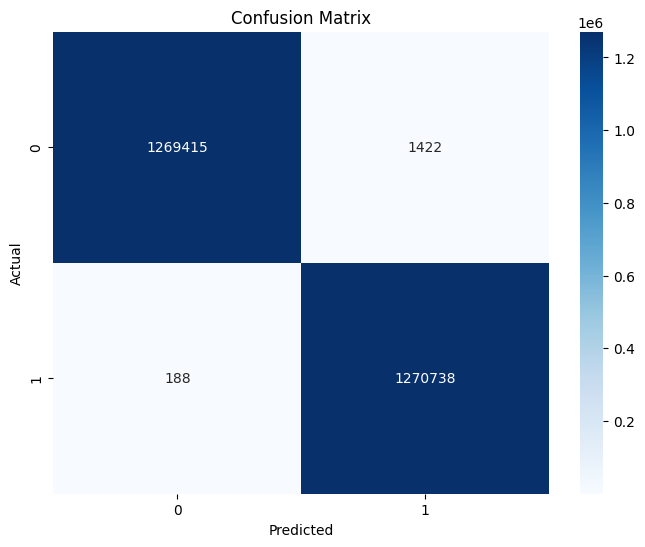

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

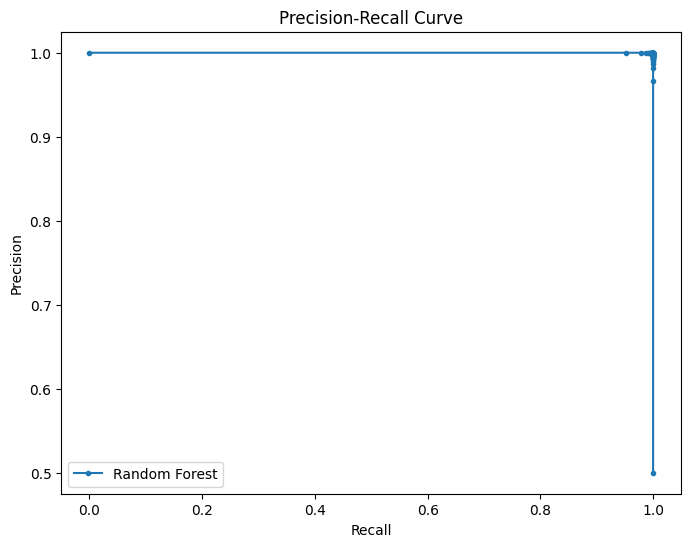

In [20]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

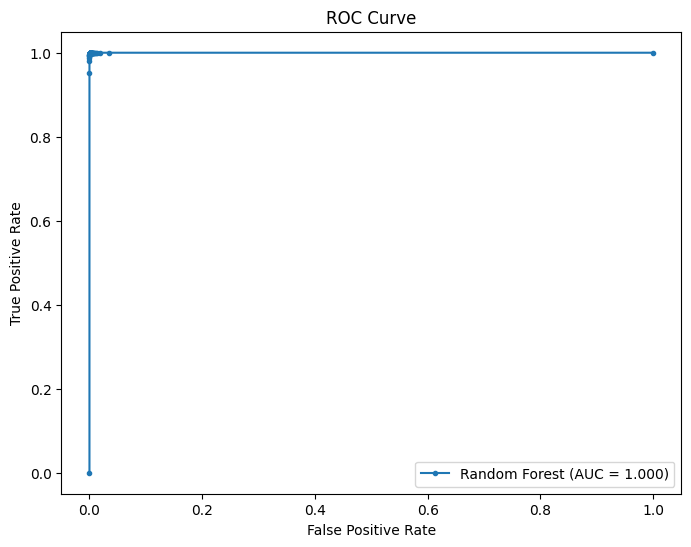

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Random Forest (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [22]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



In [30]:
# Identify rows from the original test set that corresponds to the predictions
X_test_original = X_test.copy()
X_test_original['Actual'] = y_test
X_test_original['Predicted'] = y_pred
X_test_original['Prediction_Probability'] = y_pred_prob

# Fitting into the shape that Tableau expects by including the necessary columns back
X_test_original['type'] = le.inverse_transform(X_test_original['type'])  # Decode 'type' column
X_test_original['TransactionID'] = X_test_original.index  # A new column TransactionID has been included to facilitate identification of transactions.

# The final results are available to download in the form of the CSV file.
X_test_original.to_csv('Data Set.csv', index=False)
print("\nFinal dataset saved to 'Data Set.csv'")

# Show samples of the final dataset
print("\nPreview of the final dataset:")
print(X_test_original.head())
print("\nFinal dataset shape:", X_test_original.shape)


Final dataset saved to 'Model_Result.csv'

Preview of the final dataset:
          step      type    amount  oldbalanceOrg  newbalanceOrig  \
4343509    308  CASH_OUT  0.001211       0.000000        0.000000   
410044      18   PAYMENT  0.000161       0.000000        0.000000   
10522549   537  CASH_OUT  0.002007       0.003114        0.000000   
1467409    140   PAYMENT  0.000043       0.000872        0.000968   
8677127    512  TRANSFER  0.012271       0.019038        0.000000   

          oldbalanceDest  newbalanceDest  Actual  Predicted  \
4343509         0.000473        0.000788       0          0   
410044          0.000000        0.000000       0          0   
10522549        0.006793        0.007311       1          1   
1467409         0.000000        0.000000       0          0   
8677127         0.000000        0.000000       1          1   

          Prediction_Probability  TransactionID  
4343509                     0.00        4343509  
410044                      0.00

In [32]:
from google.colab import files
files.download('/content/Data Set.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>